In [133]:
#  importing libraries
import torch 
from torch import nn, load,save
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import Adam
from torchvision.transforms import ToTensor
from PIL import Image

In [134]:
# setting up device configuration
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [135]:
# setting up hyperparameters
epoch=20
batchsize=32
lr=1e-3


In [136]:
#  transform dataset of range [0,1] to tensor of normalized range [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [137]:
train_dataset=torchvision.datasets.CIFAR10(train=True,root='./dataset',download=True,transform=transform)
test_dataset=torchvision.datasets.CIFAR10(train=False,root='./dataset',download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [138]:
# Inspect the shape of the first sample
sample, label = train_dataset[0]
print(f'Sample shape: {sample.shape}')  # Should print torch.Size([3, 32, 32])
print(f'Label: {label}')

Sample shape: torch.Size([3, 32, 32])
Label: 6


In [139]:
train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=batchsize,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=batchsize, shuffle=False)

In [140]:
# define classes
classes=('plane','car','bird','cat','deer', 'dog', 'frog','horse', 'ship','truck')

In [141]:
# Convolutional Network class
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Conv2d(3,32,(3,3)),  #3 x 32 X 32 -> 32-3+1 -> 32 x 30 X 30
            nn.ReLU(),
            nn.Conv2d(32,64,(3,3)), #32 x 30 X 30 -> 30-3+1 -> 64 x 28 X 28
            nn.ReLU(),
            nn.Conv2d(64,128,(3,3)), #64 x 28 X 28 -> 28-3+1 -> 128 x 26 x 26
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128*26* 26,10)
            
        )
    def forward(self,x):
        return self.model(x)
        

In [142]:
#  create an insitance of NN, loss and optimizer
clf=ImageClassifier().to(device)
opt=Adam(clf.parameters(),lr=lr)
loss_func=nn.CrossEntropyLoss() #for multi-class classification

In [95]:
# #  training flow 
# if __name__=="__main__":
#     for epoc in range(epoch):
#         for batch in train_dataloader:
#             X,y=batch
#             X,y=X.to(device),y.to(device)
#             y_hat=clf(X)
#             loss=loss_func(y_hat,y)


#             # back propagation
#             opt.zero_grad()
#             loss.backward()
#             opt.step()

      
#         print(f"Epoch:{epoc}, loss is : {loss} ")


Epoch:0, loss is : 0.02110102027654648 
Epoch:1, loss is : 0.0002584050816949457 
Epoch:2, loss is : 0.0008107690955512226 
Epoch:3, loss is : 0.057763081043958664 
Epoch:4, loss is : 0.004789986182004213 
Epoch:5, loss is : 0.00045358837815001607 
Epoch:6, loss is : 3.650685130196507e-06 
Epoch:7, loss is : 1.8641433715820312 
Epoch:8, loss is : 0.002077673329040408 
Epoch:9, loss is : 0.0026132469065487385 
Epoch:10, loss is : 2.6747011361294426e-06 
Epoch:11, loss is : 5.215405707303944e-08 
Epoch:12, loss is : 2.9802318834981634e-08 
Epoch:13, loss is : 1.2895624422526453e-05 
Epoch:14, loss is : 0.0002303507790202275 
Epoch:15, loss is : 1.1026811534975423e-06 
Epoch:16, loss is : 0.0 
Epoch:17, loss is : 2.098480035783723e-05 
Epoch:18, loss is : 0.032306089997291565 
Epoch:19, loss is : 1.2277352652745321e-05 


In [96]:
with open('model_state.pt','wb') as f:
    save(clf.state_dict(),f)

In [143]:
with open('model_state.pt', 'rb') as f:
    clf.load_state_dict(load(f))

In [145]:
# Prepare image for model
image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

# Initialize the model
clf = ImageClassifier().to(device)

# Load the state dictionary
clf.load_state_dict(torch.load('model_state.pt'))

# Set the model to evaluation mode
clf.eval()

ImageClassifier(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=86528, out_features=10, bias=True)
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].


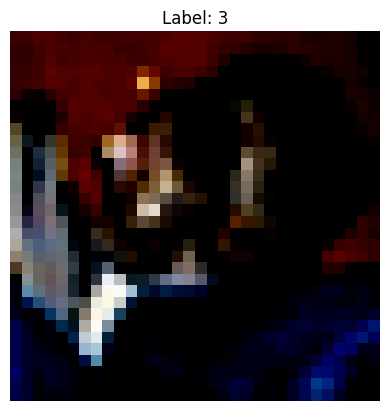

In [144]:
# Select an image for prediction
image, label = test_dataset[0]
plt.imshow(image.permute(1, 2, 0))  # Display image
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [146]:
# Make prediction
with torch.no_grad():
    output = clf(image)
    predicted_label = torch.argmax(output)

print(f'Predicted label: {predicted_label.item()}')

Predicted label: 3
